In [1]:
# 기본 packages loading
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
# 분석할 데이터 셋 로딩
train_input = pd.read_csv('C:/Users/admin/Downloads/open/train_input/CASE_01.csv')
train_target = pd.read_csv('C:/Users/admin/Downloads/open/train_target/CASE_01.csv')

## Data exploration

In [5]:
train_input.info(), train_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41760 entries, 0 to 41759
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   시간             41760 non-null  object 
 1   내부온도관측치        41758 non-null  float64
 2   내부습도관측치        41758 non-null  float64
 3   CO2관측치         41758 non-null  float64
 4   EC관측치          41758 non-null  float64
 5   외부온도관측치        41758 non-null  float64
 6   외부습도관측치        41758 non-null  float64
 7   펌프상태           41758 non-null  float64
 8   펌프작동남은시간       41758 non-null  float64
 9   최근분무량          41758 non-null  float64
 10  일간누적분무량        41758 non-null  float64
 11  냉방상태           41758 non-null  float64
 12  냉방작동남은시간       41758 non-null  float64
 13  난방상태           41758 non-null  float64
 14  난방작동남은시간       41758 non-null  float64
 15  내부유동팬상태        41758 non-null  float64
 16  내부유동팬작동남은시간    41758 non-null  float64
 17  외부환기팬상태        41758 non-null  float64
 18  외부환기팬작

(None, None)

In [8]:
train_input.tail()

,시간,내부온도관측치,내부습도관측치,CO2관측치,EC관측치,외부온도관측치,외부습도관측치,펌프상태,펌프작동남은시간,최근분무량,...,카메라상태,냉방온도,난방온도,기준온도,난방부하,냉방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량
41755,2021-03-17 23:55:00,20.4,78.000000,470.0,0.313223,20.400000,31.500000,0.0,0.0,769.0,...,0.0,20.0,18.0,19.0,0.0,1.999998,0.0,0.0,0.0,0.0
41756,2021-03-17 23:56:00,20.4,78.199997,471.0,0.314777,20.500000,31.400000,0.0,0.0,769.0,...,0.0,20.0,18.0,19.0,0.0,1.999998,0.0,0.0,0.0,0.0
41757,2021-03-17 23:57:00,20.5,79.199997,468.0,0.315554,20.600000,31.299999,0.0,0.0,769.0,...,0.0,20.0,18.0,19.0,0.0,1.999998,0.0,0.0,0.0,0.0
41758,2021-03-17 23:58:00,20.6,79.599998,471.0,0.316332,20.799999,31.200001,0.0,0.0,769.0,...,0.0,20.0,18.0,19.0,0.0,2.500000,0.0,0.0,0.0,0.0
41759,2021-03-17 23:59:00,20.6,79.900002,476.0,0.316332,20.900000,31.100000,0.0,0.0,769.0,...,0.0,20.0,18.0,19.0,0.0,3.000002,0.0,0.0,0.0,0.0


In [7]:
train_target.shape

(29, 2)

In [9]:
# 컬럼명 확인
train_input.columns
## 컬럼명이 모두 한국어임.

Index(['시간', '내부온도관측치', '내부습도관측치', 'CO2관측치', 'EC관측치', '외부온도관측치', '외부습도관측치',
       '펌프상태', '펌프작동남은시간', '최근분무량', '일간누적분무량', '냉방상태', '냉방작동남은시간', '난방상태',
       '난방작동남은시간', '내부유동팬상태', '내부유동팬작동남은시간', '외부환기팬상태', '외부환기팬작동남은시간',
       '화이트 LED상태', '화이트 LED작동남은시간', '화이트 LED동작강도', '레드 LED상태', '레드 LED작동남은시간',
       '레드 LED동작강도', '블루 LED상태', '블루 LED작동남은시간', '블루 LED동작강도', '카메라상태', '냉방온도',
       '난방온도', '기준온도', '난방부하', '냉방부하', '총추정광량', '백색광추정광량', '적색광추정광량',
       '청색광추정광량'],
      dtype='object')

In [10]:
# 컬럼명 수정
train_input.columns=['time', 'in_temp','in_hum', 'Co2','EC','out_temp',
                    'out_hum','pump_stat','pump_rest','r_sprayVol',
                     'd_sprayVol', 'cool_stat','cool_rest','heat_stat',
                    'heat_rest','in_fan','in_fen_rest','out_fan','out_fan_rest',
                    'wLED','wLED_rest','wLED_act','rLED','rLED_rest','rLED_act',
                    'bLED','bLED_rest','bLED_act','cam','cool_temp','heat_temp',
                    'stand_temp','heat_lose','cool_lose','tot_amount','w_amount',
                    'r_amount','b_amount']
train_input.columns 

Index(['time', 'in_temp', 'in_hum', 'Co2', 'EC', 'out_temp', 'out_hum',
       'pump_stat', 'pump_rest', 'r_sprayVol', 'd_sprayVol', 'cool_stat',
       'cool_rest', 'heat_stat', 'heat_rest', 'in_fan', 'in_fen_rest',
       'out_fan', 'out_fan_rest', 'wLED', 'wLED_rest', 'wLED_act', 'rLED',
       'rLED_rest', 'rLED_act', 'bLED', 'bLED_rest', 'bLED_act', 'cam',
       'cool_temp', 'heat_temp', 'stand_temp', 'heat_lose', 'cool_lose',
       'tot_amount', 'w_amount', 'r_amount', 'b_amount'],
      dtype='object')

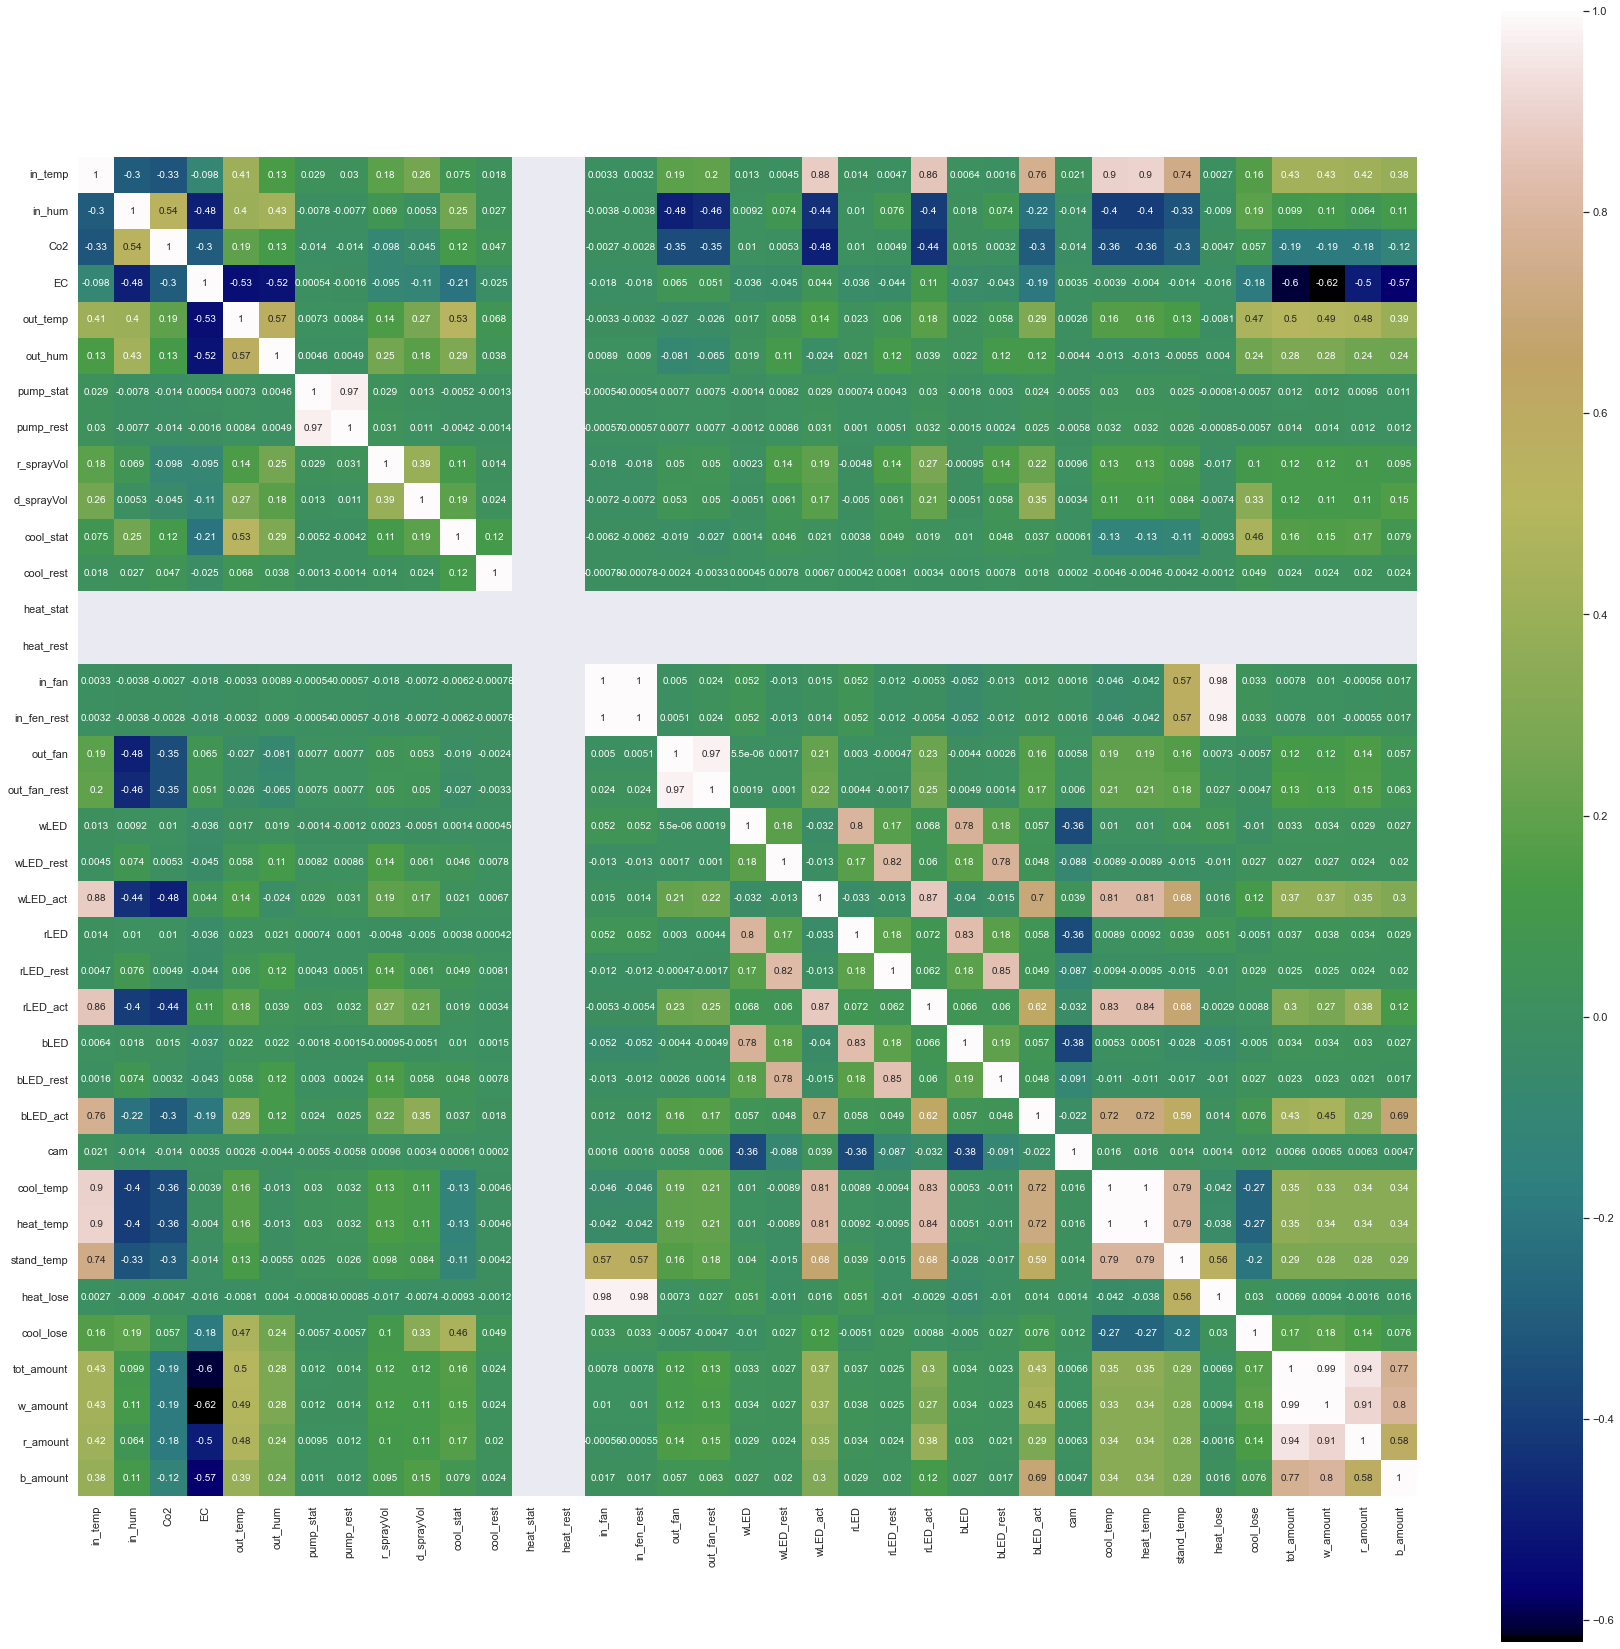

In [46]:
# 상관계수를 보기위한 히트맵
import seaborn as sns
data = train_input[['in_temp','in_hum', 'Co2','EC','out_temp',
                    'out_hum','pump_stat','pump_rest','r_sprayVol',
                     'd_sprayVol', 'cool_stat','cool_rest','heat_stat',
                    'heat_rest','in_fan','in_fen_rest','out_fan','out_fan_rest',
                    'wLED','wLED_rest','wLED_act','rLED','rLED_rest','rLED_act',
                    'bLED','bLED_rest','bLED_act','cam','cool_temp','heat_temp',
                    'stand_temp','heat_lose','cool_lose','tot_amount','w_amount',
                    'r_amount','b_amount']]
# object객체인 시간을 제외한 컬럼들의 상관관계 시각화
sns.set(rc = {'figure.figsize':(30,30)})
sns.heatmap(data.corr(), vmax=1.0, square=True,cmap=plt.cm.gist_earth,
            linecolor='w', annot=True, annot_kws={'size':10})
plt.show()

### train 데이터 내 상관관계
- 온도들 끼리 강한 양의 상관관계를 보임. 또한 온도와 밀접한 광원속성의 컬럼들도 서로간의 강한 상관관계를 보임
- 광원속성의 컬럼들과 온도속성의 컬럼들 역시 강한 양의 상관관계를 뛰는 것을 확인함
- 팬시간과는 난방부하와 강한 상관관계를 나타내고
- EC수치는 추정관원총량, 화이트led추정총량과 다소 강한 음의 상관관계를 뛰고, 나머지 광원역시 음의 상관관계를 뜀
- 내부온도는 광원들의 강도와 냉난방 온도와 강한 상관관계를 뜀.

In [18]:
# 결측값 확인
train_input.isnull().sum()

time            0
in_temp         2
in_hum          2
Co2             2
EC              2
out_temp        2
out_hum         2
pump_stat       2
pump_rest       2
r_sprayVol      2
d_sprayVol      2
cool_stat       2
cool_rest       2
heat_stat       2
heat_rest       2
in_fan          2
in_fen_rest     2
out_fan         2
out_fan_rest    2
wLED            2
wLED_rest       2
wLED_act        2
rLED            2
rLED_rest       2
rLED_act        2
bLED            2
bLED_rest       2
bLED_act        2
cam             2
cool_temp       2
heat_temp       2
stand_temp      2
heat_lose       2
cool_lose       2
tot_amount      2
w_amount        2
r_amount        2
b_amount        2
dtype: int64

In [25]:
data.describe()

,in_temp,in_hum,Co2,EC,out_temp,out_hum,pump_stat,pump_rest,r_sprayVol,d_sprayVol,...,cam,cool_temp,heat_temp,stand_temp,heat_lose,cool_lose,tot_amount,w_amount,r_amount,b_amount
count,41758.000000,41758.000000,41758.000000,41758.000000,41758.000000,41758.000000,41758.000000,41758.000000,41758.000000,41758.000000,...,41758.000000,41758.000000,41758.000000,41758.000000,41758.000000,41758.000000,41758.000000,41758.000000,41758.000000,41758.000000
mean,23.256809,55.422683,388.852807,0.737887,21.502344,23.871815,2.406952,1.462690,709.256030,6020.974956,...,0.683618,22.395211,20.395259,21.403941,0.000605,4.639615,84.652694,58.486144,22.317093,3.849457
std,2.339156,19.117794,48.603578,0.188674,1.813407,5.099884,21.844382,12.659996,196.075486,4114.333020,...,11.633410,2.393835,2.393407,2.919250,0.082587,4.856239,174.108895,118.970316,51.005795,9.950972
min,18.200001,9.500000,324.000000,0.000000,16.299999,8.600000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.799999,39.200001,353.000000,0.555718,20.400000,23.000000,0.000000,0.000000,762.570000,2294.140000,...,0.000000,20.000000,18.000000,19.000000,0.000000,1.999998,0.000000,0.000000,0.000000,0.000000
50%,23.700001,61.400002,370.000000,0.832411,21.600000,25.100000,0.000000,0.000000,769.000000,6132.710000,...,0.000000,21.666194,19.666194,20.666602,0.000000,3.500004,0.000000,0.000000,0.000000,0.000000
75%,25.500000,71.599998,416.000000,0.904693,22.799999,27.000000,0.000000,0.000000,769.000000,9971.280000,...,0.000000,25.000000,23.000000,24.000000,0.000000,5.500002,0.000000,0.000000,0.000000,0.000000
max,27.500000,85.699997,987.000000,0.925678,26.600000,33.500000,201.000000,119.000000,769.000000,14585.280000,...,201.000000,25.000000,23.000000,363.554000,16.548000,37.596000,496.821000,309.410000,165.480000,61.093500


In [26]:
data.median()

in_temp           23.700001
in_hum            61.400002
Co2              370.000000
EC                 0.832411
out_temp          21.600000
out_hum           25.100000
pump_stat          0.000000
pump_rest          0.000000
r_sprayVol       769.000000
d_sprayVol      6132.710000
cool_stat        201.000000
cool_rest         72.166667
heat_stat          0.000000
heat_rest          0.000000
in_fan             0.000000
in_fen_rest        0.000000
out_fan            0.000000
out_fan_rest       0.000000
wLED             201.000000
wLED_rest        247.000000
wLED_act         100.000000
rLED             201.000000
rLED_rest        249.000000
rLED_act          53.000000
bLED             201.000000
bLED_rest        251.000000
bLED_act           4.000000
cam                0.000000
cool_temp         21.666194
heat_temp         19.666194
stand_temp        20.666602
heat_lose          0.000000
cool_lose          3.500004
tot_amount         0.000000
w_amount           0.000000
r_amount           0

In [27]:
data.mean()

in_temp           23.256809
in_hum            55.422683
Co2              388.852807
EC                 0.737887
out_temp          21.502344
out_hum           23.871815
pump_stat          2.406952
pump_rest          1.462690
r_sprayVol       709.256030
d_sprayVol      6020.974956
cool_stat        123.528055
cool_rest         78.410987
heat_stat          0.000000
heat_rest          0.000000
in_fan             0.004837
in_fen_rest        0.009435
out_fan           28.074561
out_fan_rest      15.317209
wLED             199.705158
wLED_rest        245.646667
wLED_act          61.139662
rLED             199.688251
rLED_rest        247.858710
rLED_act          46.714522
bLED             199.658341
bLED_rest        249.974280
bLED_act           6.237140
cam                0.683618
cool_temp         22.395211
heat_temp         20.395259
stand_temp        21.403941
heat_lose          0.000605
cool_lose          4.639615
tot_amount        84.652694
w_amount          58.486144
r_amount          22

In [48]:
# 중간값과 중앙값이 차이가 많이 나는 특정변수(광량, 외부팬)만 중앙값으로 결측치를 대체하고, 나머지 속성은 평균값으로 대체
## 중앙값으로 대체할 속성의 결측값 대체
data[['w_amount','r_amount','b_amount','out_fan','out_fan_rest']]=data[['w_amount','r_amount','b_amount','out_fan','out_fan_rest']].fillna(data[['w_amount','r_amount','b_amount','out_fan','out_fan_rest']].median())

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [50]:
## 평균으로 대체할 속성의 결측값 대체
data = data.fillna(data.mean())

In [51]:
data.isnull().sum() # 결측치 제거 완료

in_temp         0
in_hum          0
Co2             0
EC              0
out_temp        0
out_hum         0
pump_stat       0
pump_rest       0
r_sprayVol      0
d_sprayVol      0
cool_stat       0
cool_rest       0
heat_stat       0
heat_rest       0
in_fan          0
in_fen_rest     0
out_fan         0
out_fan_rest    0
wLED            0
wLED_rest       0
wLED_act        0
rLED            0
rLED_rest       0
rLED_act        0
bLED            0
bLED_rest       0
bLED_act        0
cam             0
cool_temp       0
heat_temp       0
stand_temp      0
heat_lose       0
cool_lose       0
tot_amount      0
w_amount        0
r_amount        0
b_amount        0
dtype: int64

In [52]:
data.shape

(41760, 37)

## 데이터 전처리
- train데이터는29일간의 1분당 속성들의 변화를 나타낸 자료.
- 타겟 데이터는 1일간의 잎의 변화율을 나타낸 값이니 트레인 데이터를 1일 총 평균, 최대값, 최소값등으로 수치의 특성을 파악


각 자료를 위에서 부터 1440건씩 나누어서 해당값의 평균(최대최소)을 일일당의 자료로 삼아서 성장 비율을 예측할 수 있지 않을까?/


In [86]:
# 값을 변환하기 위한 방법 탐색
data.cam[:1140].mean()

0.7092105263157895

In [92]:
x = data[:1140].mean() # a=data[1140x:1140y].mean()

In [93]:
y = data[1140:2280].mean()

In [95]:
type(x)

pandas.core.series.Series

In [96]:
df = pd.DataFrame(index=range(0,29), columns = data.columns)
df.loc[0]= x.to_list()
# 29일치 자료를 담을 빈 df를 생성하여서 각 컬럼에 해당하는 일별 평균값들을 행단위로 값 변경해주기

In [131]:
# 전환용 함수정의
def day_mean(x,y):
    a = data[1140 * x : 1140 * y].mean()
    df.loc[x] = a.to_list()

In [99]:
# 함수 테스트
day_mean(1,2)
df.head() # ok

,in_temp,in_hum,Co2,EC,out_temp,out_hum,pump_stat,pump_rest,r_sprayVol,d_sprayVol,...,cam,cool_temp,heat_temp,stand_temp,heat_lose,cool_lose,tot_amount,w_amount,r_amount,b_amount
0,23.102895,23.337412,393.174561,0.914882,19.131184,10.090658,0.352632,0.260965,71.503509,101.858772,...,0.709211,23.008763,21.010518,22.328548,0.014516,1.278866,0.318907,0.271412,0.014516,0.032979
1,21.51307,39.930117,388.75731,0.90894,17.707105,10.410482,2.293421,1.406579,711.965658,3285.516412,...,0.705263,21.842107,19.842107,20.842107,0.0,1.025565,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
# 위과정을 포문으로 반복
for i in range(28):
    day_mean(i,i+1)
    
df

,in_temp,in_hum,Co2,EC,out_temp,out_hum,pump_stat,pump_rest,r_sprayVol,d_sprayVol,...,cam,cool_temp,heat_temp,stand_temp,heat_lose,cool_lose,tot_amount,w_amount,r_amount,b_amount
0,23.102895,23.337412,393.174561,0.914882,19.131184,10.090658,0.352632,0.260965,71.503509,101.858772,...,0.709211,23.008763,21.010518,22.328548,0.014516,1.278866,0.318907,0.271412,0.014516,0.032979
1,21.51307,39.930117,388.75731,0.90894,17.707105,10.410482,2.293421,1.406579,711.965658,3285.516412,...,0.705263,21.842107,19.842107,20.842107,0.0,1.025565,0.0,0.0,0.0,0.0
2,21.251579,36.111988,356.832602,0.904283,17.7325,12.056272,2.821053,1.555263,695.646456,6486.815377,...,0.881579,21.710543,19.710543,20.710543,0.000439,0.92386,0.0,0.0,0.0,0.0
3,22.30921,24.321272,352.211842,0.907966,18.820965,16.683026,2.293421,1.328509,761.967807,6857.274754,...,0.881579,22.499985,20.499985,21.499985,0.006579,1.221911,0.0,0.0,0.0,0.0
4,23.763245,27.639342,354.225439,0.911673,20.233772,20.375175,2.468421,1.560965,766.247509,6900.28407,...,0.705263,23.026321,21.026321,22.026321,0.0,3.981109,0.0,0.0,0.0,0.0
5,23.745175,33.939605,379.498246,0.911215,21.929035,21.238202,2.468421,1.433333,705.440825,4633.652175,...,0.705263,22.894753,20.894753,21.894753,0.0,4.24491,0.0,0.0,0.0,0.0
6,22.924781,61.127281,372.782018,0.911077,21.992763,25.725482,2.293421,1.42807,730.205939,5618.358702,...,0.705263,21.71046,19.71046,20.71046,0.0,6.067,0.0,0.0,0.0,0.0
7,23.028816,64.461009,389.796491,0.909273,22.530789,25.08943,2.293421,1.295175,699.103377,6507.119535,...,0.528947,21.710179,19.710179,20.710179,0.0,6.593441,0.0,0.0,0.0,0.0
8,23.947368,61.239825,386.015789,0.909025,22.204824,18.019254,2.997368,1.771053,696.808368,8196.587079,...,1.057895,22.763176,20.763176,21.763176,0.0,5.945527,0.0,0.0,0.0,0.0
9,24.13443,65.27136,417.239912,0.909995,21.577807,18.852675,2.644737,1.536404,748.034816,6226.950482,...,0.705263,23.026298,21.026298,22.026298,0.0,5.630132,0.0,0.0,0.0,0.0


- 위 train_data파일과 train_target파일 각각50개 가량존재.
- 로딩해서 같은 과정 반복하여 데이터량 수집하기
- 함수정의할 때 링크 대체법 못찾아서 그냥 수작업으로..

In [147]:
# 파일 로딩하기
input_2 = pd.read_csv('C:/Users/admin/Downloads/open/train_input/CASE_2.csv')
target_2 = pd.read_csv('C:/Users/admin/Downloads/open/train_target/CASE_2.csv')
input_3 = pd.read_csv('C:/Users/admin/Downloads/open/train_input/CASE_3.csv')
target_3 = pd.read_csv('C:/Users/admin/Downloads/open/train_target/CASE_3.csv')
input_4 = pd.read_csv('C:/Users/admin/Downloads/open/train_input/CASE_4.csv')
target_4 = pd.read_csv('C:/Users/admin/Downloads/open/train_target/CASE_4.csv')
input_5 = pd.read_csv('C:/Users/admin/Downloads/open/train_input/CASE_5.csv')
target_5 = pd.read_csv('C:/Users/admin/Downloads/open/train_target/CASE_5.csv')
input_6 = pd.read_csv('C:/Users/admin/Downloads/open/train_input/CASE_6.csv')
target_6 = pd.read_csv('C:/Users/admin/Downloads/open/train_target/CASE_6.csv')
input_7 = pd.read_csv('C:/Users/admin/Downloads/open/train_input/CASE_7.csv')
target_7 = pd.read_csv('C:/Users/admin/Downloads/open/train_target/CASE_7.csv')
input_8 = pd.read_csv('C:/Users/admin/Downloads/open/train_input/CASE_8.csv')
target_8 = pd.read_csv('C:/Users/admin/Downloads/open/train_target/CASE_8.csv')
input_9 = pd.read_csv('C:/Users/admin/Downloads/open/train_input/CASE_9.csv')
target_9 = pd.read_csv('C:/Users/admin/Downloads/open/train_target/CASE_9.csv')

In [140]:
# 일단 있는 자료들 먼저 해보기
# object객체인 시간을 제외한 컬럼들의 상관관계 시각화
sns.set(rc = {'figure.figsize':(30,30)})
sns.heatmap(df.corr(), vmax=1.0, square=True,cmap=plt.cm.bone,
            linecolor='w', annot=True, annot_kws={'size':10})
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

In [141]:
df['grouth']

pandas.core.frame.DataFrame

In [142]:
type(df)

pandas.core.frame.DataFrame

In [146]:
df.isnull().sum()

in_temp         0
in_hum          0
Co2             0
EC              0
out_temp        0
out_hum         0
pump_stat       0
pump_rest       0
r_sprayVol      0
d_sprayVol      0
cool_stat       0
cool_rest       0
heat_stat       0
heat_rest       0
in_fan          0
in_fen_rest     0
out_fan         0
out_fan_rest    0
wLED            0
wLED_rest       0
wLED_act        0
rLED            0
rLED_rest       0
rLED_act        0
bLED            0
bLED_rest       0
bLED_act        0
cam             0
cool_temp       0
heat_temp       0
stand_temp      0
heat_lose       0
cool_lose       0
tot_amount      0
w_amount        0
r_amount        0
b_amount        0
dtype: int64